## Potential models

Potential models are a more computationally efficient way to determine the **potential energy** of a chemical system. 
In practice, a potential model consists of a series of many mathematical functions that depend on the position of the atoms ($\mathbf{r}$), each of which represent a different contribution to the potential energy. 
For a molecular system, this is represented as a series of bonded and non-bonded terms, 

$$ E(\mathbf{r}) = E_{\text{bond}}(\mathbf{r}) + E_{\text{non-bond}}(\mathbf{r}). $$

The total potential energy of the given system is then the sum of the potential energy from each atom. 
It is common for bonded potential energy to consist of a term depending on each of bond length, angle, and dihedral. 
For example, bond lenghts are often modelled with a harmonic potential energy function, 

$$ E_{\text{bond length}}(\mathbf{r}_{ij}) = K_b(\mathbf{r}_{ij} - b_0), $$

where, $b_0$ and $K_b$ are bond specific parameters which must be determined (see episode 2), and $\mathbf{r}_{ij}$ is the distance between the two bonded particles. 
An example of this function can be seen below, using parameters for a carbon-carbon bond.

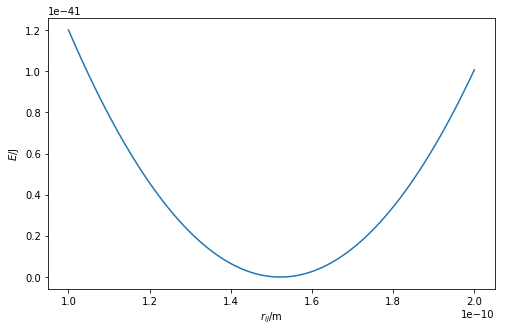

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def bonded(kb, b0, rij):
    """
    Calculation of the potential energy of a bond.
    
    Parameters
    ----------
    kb: float
        Bond force constant (units: k)
    b0: float 
        Equilibrium bond length
    rij: float
        Distance between two atoms
    
    Returns
    float
        Energy of the bonded interaction
    """
    return kb * (rij - b0) ** 2

r = np.linspace(1e-10, 2e-10, 100)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(r, bonded(4.4049e-21, 1.522e-10, r))
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$E$/J')
plt.show()

For the sake of simplicity, the remainder of these episode will focus only on non-bonded interactions. 
However, it is important to be aware that all aspects mentioned are **equally applicable** to bonded interactions.

The non-bonded interactions that are often considered consist of long-range and short-range interactions. 
The long-range interactions are usually consist of the classical electrostatic interactions between particles. 
For example, Coulomb's law may be used to model the potential energy of the long-range interaction between oppositely charge point particles,

$$ E_{\text{Coulomb}}(r_{ij}) = \frac{1}{4\pi\epsilon_0}\frac{q_iq_je^2}{r_{ij}}, $$ 

where, $q_i$ and $q_j$ are the electronic charge on the particles, $e$ is the charge of the electron, $\epsilon$ is the dielectric permitivity of vacuum, and $r_{ij}$ is the distance between the two point particles. 

The Python code below defines a function that models the electrostatic interaction using Coulomb's law and plots it.

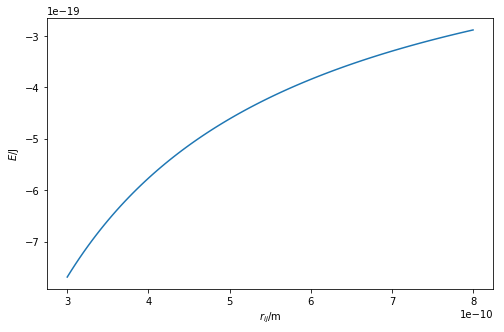

In [5]:
from scipy.constants import e, epsilon_0

def coulomb_energy(qi, qj, rij):
    """
    Calculation of Coulomb's law.
    
    Parameters
    ----------
    qi: float
        Electronic charge on particle i
    qj: float
        Electronic charge on particle j
    rij: float 
        Distance between particles i and j
        
    Returns
    -------
    float
        Energy of the Coulombic interaction
    """
    return (qi * qj * e ** 2) / (4 * np.pi * epsilon_0 * rij)

r = np.linspace(3e-10, 8e-10, 100)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(r, coulomb_energy(1, -1, r))
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$E$/J')
plt.show()

The above code and plot can be thought of as the interaction between a sodium ion (Na<sup>+</sup>) and a chloride ion (Cl<sup>-</sup>).
These ions have opposite charges and therefore will be very strongly attracted to each other.
This makes for a relatively straight-forward example, as it is clear that Coulomb's law is a suitable model for the potential energy of the two oppositely and integer charged point (atomic) objects. 

## References
